# Case 1: Heart Disease Classification
Neural Networks for Health Technology Applications, Spring 2020 <br>
Team members:
    1. Bellarina Chew
    2. Nik Adam Nik Joharris
    3. Valentin Dassin
Last modified: 30.01.2020<br>
Helsinki Metropolia University of Applied Sciences

## Background
The main objective is to create and train a dense neural network to predict to classify the presence of heart disease accurately.<br> 
To achieve the main objective, the sub-objectives must be achieved. They include:
- Building binary classification models using the deep learning framework, Keras.
- Achieving a decent accuracy on training and test data.
- Achieving a stable model performance.

## Data
The dataset used is a processed heart disease dataset from Cleveland Clinic Foundation (processed.cleveland.data) which contains 14 variables/attributes as described below:
0. **age**      : Age in years     
1. **sex**      : sex (1 = male; 0 = female)
2. **cp**       : chest pain type (1 = typical angina; 2 = atypicaal angina; 3 = non-anginal pain; 4 = asymptomatic)
3. **trestbps** : resting blood pressure in mm Hg
4. **chol**     : serum cholestoral in mg/dl
5. **fbs**      : fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
6. **restecg**  : resting electrocardiographic results (0= normal; 1 = having ST-T wave abnormality; 2 = showing probable or definite left ventricular hypertrophy)
7. **thalach**  : maximum heart rate achieved
8. **exang**    : exercise induced angina (1 = yes; 0 = no)
9. **oldpeak**  : ST depression induced by exercise relative to rest
10. **slope**   : the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)
11. **ca**      : number of major vessels (0-3) colored by flourosopy
12. **thal**    : 3 = normal; 6 = fixed defect; 7 = reversable defect
13. **num**     : diagnosis of heart disease (angiographic disease status)

In [122]:
# Preprocess data-set
# Import important libraries
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn import preprocessing

# Import Keras specific
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Populating the interactive namespace from numpy and matplotlib


In [133]:
# Import dataset
filename = "/Users/bella/Desktop/year 3/Neural Network/processed.cleveland.data"
df = pd.read_csv(filename,
                index_col = None,
                header = None,
                na_values ='?')

# print data shape
print(df.shape)
df.describe()

(303, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


The dataset used contains 303 observations and 14 variables/attributes. However, there are missing values in attribute 11(ca) and 12 (thal). As a result, missing values is handled for a more accurate result. In this case, the best method to handle missing values is to drop rows with missing values.


In [134]:
# Check out missing value 
# drop rows with missing values
df= df.dropna()

#prints data shape
print(df.shape)

(297, 14)


After removing rows with missing values, the size became 297.

## Models and training
Arrays are created for the Features and the Response Variable.

In [103]:
# Create an array of the target variable from 0 to 12
data = df.loc[:, 0:12].values

# Create an array for the predicted attribute
# simplify the labels into two classes (healthy (=0) and disease (=1)) 
labels = 1.0 * (df.loc[:, 13].values > 0)

In [127]:
# Split data-set into Training, validation and Test Set
train_data = data[:148]
train_labels = labels[:148]

validation_data = data[149:223]
validation_labels = labels[149:223]

# The test data (25% of the data) is separated to be used once the model is completed
test_data = data[223:]
test_labels = labels[223:] 

# print shape of training set and test set
train_data.shape, validation_data.shape, test_data.shape

((148, 13), (74, 13), (74, 13))

The model is trained with 75% of the data and evaluated with 25%<br>
After splitting the data-set into Training, Validation and Test set, the shape of the training set are as follow:
- Training set : 150 observations of 13 variables
- Validation set : 74 observations of 13 variables.
- Test set : 74 observations of 13 variables. 

In [128]:
# Rescale data by normalizing
train_data = preprocessing.scale(train_data)
validation_data = preprocessing.scale(validation_data)
test_data = preprocessing.scale(test_data)

All the variables don’t have the same scale and this will cause some issue in the machine learning model. So, **Feature scaling** is used to limit the range of variables so that they can be compared on common grounds. The best method in this case is with Normaliztion as it helps to have muutch better results in fewer epochs and remove a lot of noise

In [129]:
#construct a network model 
network = Sequential()

network.add(Dense(10, input_shape=(13,), activation='relu'))
network.add(Dense(1, activation='sigmoid'))
network.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


This model have 1 layer and 10 neurons (good ratio performances/complexyty and not too long to train).
The activation function used in the hidden layers is a rectified linear unit, or ReLU. It is the most widely used activation function because of its advantages of being nonlinear, as well as the ability to not activate all the neurons at the same time. In simple terms, this means that at a time, only a few neurons are activated, making the network sparse and very efficient.

In [130]:
# Compile the model
network.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

The batch size is an important factor, usually it's quite good arround 32:
- If it is below 32, performances needs a lot of epochs before it achieves the ideal result. 
- If it is above 32, performances will improve quickly but we have big overfitting.

While to plot for the accuracy and loss, it depends on the batch size which allows us to see how quikly a model is improving.
**The goal is** to have good performances without having to set a big batch size


Train on 148 samples, validate on 74 samples
Epoch 1/30
148/148 [==============================] - 0s 806us/sample - loss: 0.4311 - accuracy: 0.8108 - val_loss: 0.5595 - val_accuracy: 0.6757
Epoch 2/30
148/148 [==============================] - 0s 674us/sample - loss: 0.4247 - accuracy: 0.8108 - val_loss: 0.5549 - val_accuracy: 0.6892
Epoch 3/30
148/148 [==============================] - 0s 561us/sample - loss: 0.4190 - accuracy: 0.8176 - val_loss: 0.5506 - val_accuracy: 0.7027
Epoch 4/30
148/148 [==============================] - 0s 569us/sample - loss: 0.4129 - accuracy: 0.8243 - val_loss: 0.5468 - val_accuracy: 0.7027
Epoch 5/30
148/148 [==============================] - 0s 677us/sample - loss: 0.4074 - accuracy: 0.8243 - val_loss: 0.5431 - val_accuracy: 0.7162
Epoch 6/30
148/148 [==============================] - 0s 632us/sample - loss: 0.4022 - accuracy: 0.8311 - val_loss: 0.5398 - val_accuracy: 0.7162
Epoch 7/30
148/148 [==============================] - 0s 595us/sample - loss: 0

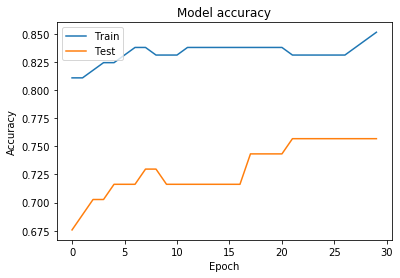

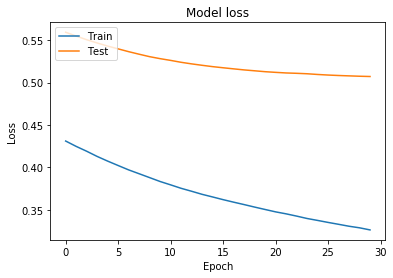

In [132]:
# fit model on the training data-set
history = network.fit(train_data, train_labels,
                    epochs=30, batch_size=35, verbose=1,
                    validation_data = (validation_data, validation_labels))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Results
Main results shown both graphically and explained textually 

# Conclusion
What were the main observations and how well the objectives were achieved